## ÍNICIO - IMPORTS / DRIVE


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Conecta o notebook ao Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

## GLOBAL GAP

In [ ]:
gg = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/UNIFICADO.xlsx', sheet_name=-3)


In [ ]:
# Checa valores na coluna 'pais'
gg['pais'].value_counts()


pais
Chile        9316
Brazil       2158
Argentina    1989
Name: count, dtype: int64

In [ ]:
# Números únicos de ggn por país
A = gg[gg['pais'] == 'Argentina']['ggn'].nunique()
B = gg[gg['pais'] == 'Brazil']['ggn'].nunique()
C = gg[gg['pais'] == 'Chile']['ggn'].nunique()

print('Argentina:', A)
print('Brasil:', B)
print('Chile:', C)


Argentina: 292
Brasil: 610
Chile: 2310


In [ ]:
# Filtra os dados para a Argentina e para o Chile
br = gg[gg['pais'] == 'Brazil']
ar = gg[gg['pais'] == 'Argentina']
ch = gg[gg['pais'] == 'Chile']


In [ ]:
# Formato de cada data frame
print(br.shape)
print(ar.shape)
print(ch.shape)


(2158, 8)
(1989, 8)
(9316, 8)


In [ ]:
# Valores duplicados para a Argentina, Brasil e o Chile
print('Brasil: ', br.duplicated().sum())
print('Argentina: ', ar.duplicated().sum())
print('Chile: ', ch.duplicated().sum())


Brasil:  143
Argentina:  1039
Chile:  277


In [ ]:
# Remove os valores duplicados para a Argentina e o Chile
br = br.drop_duplicates()
ar = ar.drop_duplicates()
ch = ch.drop_duplicates()


In [ ]:
# Remove as colunas desnecessárias no momento
br.drop(columns=['pais', 'opcao', 'nome_empresa', 'cidade', 'ggn'], inplace=True)
ar.drop(columns=['pais', 'opcao', 'nome_empresa', 'cidade', 'ggn'], inplace=True)
ch.drop(columns=['pais', 'opcao', 'nome_empresa', 'cidade', 'ggn'], inplace=True)


In [ ]:
# Agrupa os dados por ano e unidade federativa
# Conta os certificados de cada fruta por estado e ano
brl = br.groupby(['ano', 'uf']).value_counts()
ars = ar.groupby(['ano', 'uf']).value_counts()
chl = ch.groupby(['ano', 'uf']).value_counts()


In [ ]:
# Exporta os dados para o Excel
brl.to_excel('brl.xlsx')
ars.to_excel('ars.xlsx')
chl.to_excel('chl.xlsx')


**Dados já agrupados das empressas gg**

In [ ]:
gg_ar = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/gg_paises.xlsx', sheet_name=0)
gg_br = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/gg_paises.xlsx', sheet_name=1)
gg_ch = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Globalgap/gg_paises.xlsx', sheet_name=2)


## TABELAS

In [ ]:
dados = gg_br.copy()

In [ ]:
# Visão inicial dos dados
dados.head()

,ano,uf,fruta,count
0,2018,amazonas,Lime,1
1,2018,bahia,Lemon,24
2,2018,bahia,Grape (table),18
3,2018,bahia,Lime,5
4,2018,bahia,Papaya,4


In [ ]:
# Renomeia os valores da coluna de frutas
dados.replace({
    'Apple': 'Maçã',
    'Grape (table)': 'Uva',
    'Lemon': 'Limão',
    'Lime': 'Lima',
    'Avocado': 'Abacate',
    'Mango': 'Manga',
    'Melon': 'Melão',
    'Papaya': 'Mamão',
    'Watermelon': 'Melância'
}, inplace = True)


In [ ]:
# Renomeia Colunas
dados.rename(columns={'count': 'empresas_gg'}, inplace=True)


In [ ]:
# Maiúsculas para os Estados, Províncias e Regiões
dados['uf'] = dados['uf'].str.title()


In [ ]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ano          175 non-null    int64 
 1   uf           175 non-null    object
 2   fruta        175 non-null    object
 3   empresas_gg  175 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.6+ KB


In [ ]:
# Reorganiza os dados da forma correta
new_table = dados.pivot_table(index=['ano', 'uf'], columns='fruta', values='empresas_gg')


In [ ]:
# Preenche os valores faltando criados com a reorganização dos dados
new_table.fillna(0, inplace=True)


In [ ]:
# Cria coluna com a soma dos certificados POR ESTADO (LINHA)
new_table['somatorio'] = new_table.sum(axis=1)


In [ ]:
# Converte o tipo de dado das colunas para int
new_table = new_table[['Abacate', 'Limão', 'Lima', 'Maçã', 'Uva', 'somatorio', 'Mamão', 'Manga']].astype(int)


In [ ]:
new_table

fruta                 Abacate  Limão  Lima  Maçã  Uva  somatorio  Mamão  Manga
ano  uf                                                                       
2018 Atacama Iii            0      0     0     0   48         48      0      0
     Biobio Viii            0      0     0    17    1         18      0      0
     Coquimbo Iv            0     14     0     1  127        190      0     48
     La Araucania Ix        0      0     0    32    0         32      0      0
     Maule Vii              0      1     0   264   16        283      0      2
     Metropolitana          0     73     1    19  131        288      0     64
     Nuble Xvi              0      0     0    10    0         10      0      0
     Ohiggins Vi            0     11     0   210  290        525      0     14
     Taracapa I             0      6     1     0    0          7      0      0
     Valparaiso V           0     49     0     4  225        457      0    179
2019 Atacama Iii            0      0     0     0   46         46      0      0
     Biobio Viii            0      0     0     8    0          8      0      0
     Coquimbo Iv            0     16     0     1  129        202      1     55
     La Araucania Ix        0      0     0    28    0         28      0      0
     Maule Vii              0      0     0   279   18        298      0      1
     Metropolitana          0     94     1    21  129        320      0     75
     Nuble Xvi              0      0     0    12    0         12      0      0
     Ohiggins Vi            0     15     0   219  278        528      0     16
     Valparaiso V           0     56     0     9  218        490      0    207
2020 Atacama Iii            0      0     0     0   51         51      0      0
     Biobio Viii            0      0     0     9    0          9      0      0
     Coquimbo Iv            0     20     0     1  143        210      1     45
     La Araucania Ix        0      0     0    26    0         26      0      0
     Maule Vii              0      0     0   268   19        289      0      2
     Metropolitana          0     92     1    17  119        295      0     66
     Nuble Xvi              0      0     0    12    0         12      0      0
     Ohiggins Vi            0     15     0   196  280        509      0     18
     Valparaiso V           0     58     0     7  193        436      0    178
2021 Atacama Iii            0      0     0     0   44         44      0      0
     Biobio Viii            0      0     0     9    0          9      0      0
     Coquimbo Iv            0     18     0     2  127        195      1     47
     La Araucania Ix        0      0     0    26    0         26      0      0
     Los Lagos X            0      1     0     0    0          1      0      0
     Maule Vii              0      0     0   262   18        281      0      1
     Metropolitana          0     91     1    18  111        286      0     65
     Nuble Xvi              0      0     0    11    1         12      0      0
     Ohiggins Vi            0     17     0   178  261        477      0     21
     Taracapa I             0      1     0     0    0          1      0      0
     Valparaiso V           0     59     0     8  195        433      0    171
2022 Atacama Iii            0      0     0     0   41         41      0      0
     Biobio Viii            0      0     0    11    1         12      0      0
     Coquimbo Iv           39     20     0     2   96        159      2      0
     La Araucania Ix        0      0     0    23    0         23      0      0
     Los Lagos X            0      1     0     0    0          1      0      0
     Maule Vii              2      0     0   239   16        257      0      0
     Metropolitana         61     93     1    22  109        286      0      0
     Nuble Xvi              0      0     0     9    0          9      0      0
     Ohiggins Vi           25     16     0   169  264        474      0      0
     Santa Fe               0      0     0     1  

In [ ]:
# Exporta tabela para o excel
#new_table.to_excel('tabela_chile.xlsx')


---

## ANÁLISE EXPLORATÓRIA - BASE BRASIL


In [ ]:
# Carrega a base
brasil = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/BASE_BRASIL.xlsx')


In [ ]:
brasil.shape

(693, 16)

In [ ]:
# Corrige DataFrame

# Coloca nomes dos estados em maiúsculo
brasil['estado'] = brasil['estado'].str.title()

# Preenche nulos do globalgap com zeros
brasil['empresas_gg'] = brasil['empresas_gg'].fillna(0)

# Renomeia as frutas
# Cria dicionário para ajudar na renomeação
nomes = {
    'abacate': 'Abacate',
    'limao_e_lima': 'Limões e Limas',
    'maca': 'Maçã',
    'mamao': 'Mamão',
    'manga': 'Manga',
    'melao': 'Melão',
    'uva': 'Uva',
    'melancia': 'Melância'
}

# Renomeia as frutas
brasil['fruta'] = brasil['fruta'].replace(nomes)

# Transforma empresas_gg de float para int
brasil['empresas_gg'] = brasil['empresas_gg'].astype(int)


In [ ]:
brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ano                               693 non-null    int64  
 1   estado                            693 non-null    object 
 2   regiao                            693 non-null    object 
 3   fruta                             693 non-null    object 
 4   exp_kg                            693 non-null    int64  
 5   exp_fob                           693 non-null    int64  
 6   exp_USD/KG                        693 non-null    float64
 7   empresas_gg                       693 non-null    int64  
 8   area_plantada(ha)                 693 non-null    int64  
 9   area_colhida(ha)                  693 non-null    int64  
 10  qte_produzida(ton)                693 non-null    int64  
 11  rendimento_medio_producao(kg/ha)  693 non-null    int64  
 12  valor_pr

In [ ]:
brasil.head()

,ano,estado,regiao,fruta,exp_kg,exp_fob,exp_USD/KG,empresas_gg,area_plantada(ha),area_colhida(ha),qte_produzida(ton),rendimento_medio_producao(kg/ha),valor_producao(mil reais),rendimento_medio_producao(R$/Kg),renda_internacional,renda_int_bilh
0,2018,Alagoas,Nordeste,Abacate,5,14,2.800000,0,101,101,980,9703,1809,1.845918,2.120494e+11,212.049447
1,2018,Alagoas,Nordeste,Limões e Limas,63,140,2.222222,0,322,322,1909,5929,3594,1.882661,2.120494e+11,212.049447
2,2018,Alagoas,Nordeste,Maçã,766,2071,2.703655,0,0,0,0,0,0,0.000000,3.251213e+11,325.121254
3,2018,Alagoas,Nordeste,Manga,345,477,1.382609,0,1301,1301,11201,8610,8275,0.738773,9.981976e+11,998.197567
4,2018,Alagoas,Nordeste,Melância,384,186,0.484375,0,960,960,17919,18666,14992,0.836654,2.120494e+11,212.049447


---

In [ ]:
# Quais dos 27 estados do Brasil possuem produtores certificados?
brasil['estado'].nunique()


23

Dos 27 estados brasileiros, 23 possuem empresas com certificações global gap. Isso representa 85,18% das unidades federativas.

In [ ]:
# Análise descritiva das variaveis
brasil.loc[:, ['exp_kg', 'exp_fob', 'exp_USD/KG', 'empresas_gg', 'area_plantada(ha)',
               'area_colhida(ha)', 'qte_produzida(ton)', 'rendimento_medio_producao(kg/ha)',
               'valor_producao(mil reais)', 'rendimento_medio_producao(R$/Kg)', 'renda_internacional']].describe()


,exp_kg,exp_fob,exp_USD/KG,empresas_gg,area_plantada(ha),area_colhida(ha),qte_produzida(ton),rendimento_medio_producao(kg/ha),valor_producao(mil reais),rendimento_medio_producao(R$/Kg),renda_internacional
count,6.930000e+02,6.930000e+02,693.000000,693.000000,693.000000,693.000000,6.930000e+02,693.000000,6.930000e+02,693.000000,6.930000e+02
mean,6.170503e+06,5.457896e+06,1.437002,3.002886,2741.914863,2724.295815,6.815312e+04,15254.170274,9.176114e+04,1.326343,1.262545e+12
std,2.136184e+07,1.798343e+07,1.066714,13.022768,6219.549235,6195.710756,1.611866e+05,12933.154542,2.319472e+05,1.207057,1.551205e+12
min,5.000000e+00,5.000000e+00,0.025763,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,4.787637e+09
25%,3.443000e+03,4.742000e+03,0.726556,0.000000,8.000000,8.000000,8.600000e+01,5036.000000,1.070000e+02,0.578718,3.404265e+11
50%,3.493600e+04,3.790300e+04,1.156366,0.000000,342.000000,342.000000,4.495000e+03,14511.000000,7.481000e+03,1.144048,9.140434e+11
75%,9.349320e+05,6.196810e+05,1.831000,0.000000,2067.000000,2052.000000,5.006100e+04,22546.000000,6.327700e+04,1.856663,1.622587e+12
max,1.867893e+08,1.231581e+08,7.131367,146.000000,46858.000000,46857.000000,1.199368e+06,73806.000000,1.712957e+06,7.436620,1.428772e+13


In [ ]:
brx = brasil.loc[:, ['exp_kg', 'exp_fob', 'exp_USD/KG', 'empresas_gg', 'area_plantada(ha)',
               'area_colhida(ha)', 'qte_produzida(ton)', 'rendimento_medio_producao(kg/ha)',
               'valor_producao(mil reais)', 'rendimento_medio_producao(R$/Kg)', 'renda_internacional']]

<Axes: xlabel='empresas_gg', ylabel='estado'>

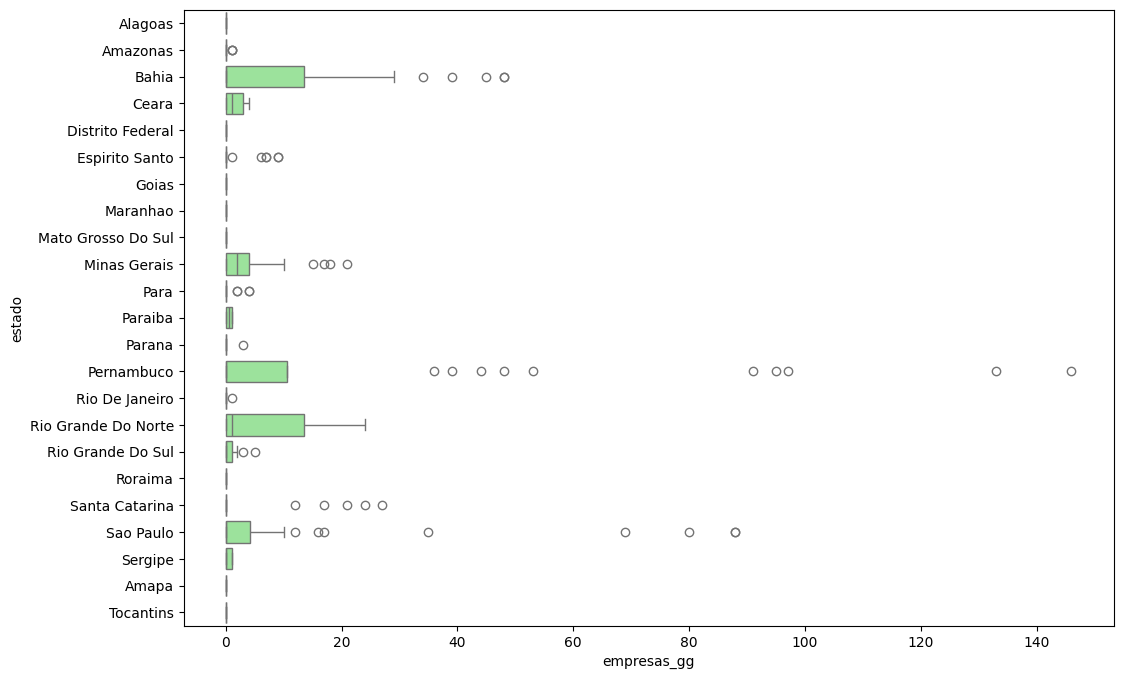

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=brasil, x="empresas_gg", y="estado", color='lightgreen')

<Axes: >

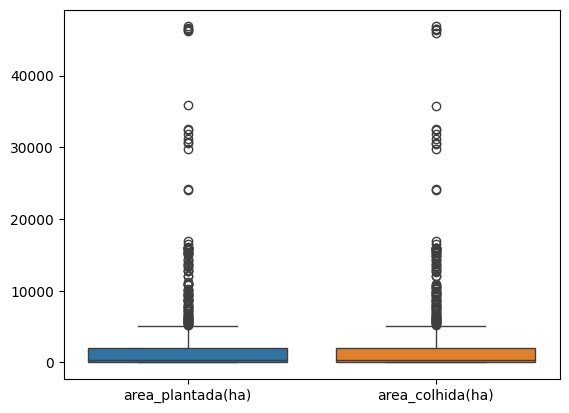

In [ ]:
# BoxPlot de algumas variáveis
sns.boxplot(data=brasil[['area_plantada(ha)', 'area_colhida(ha)']])


<Axes: >

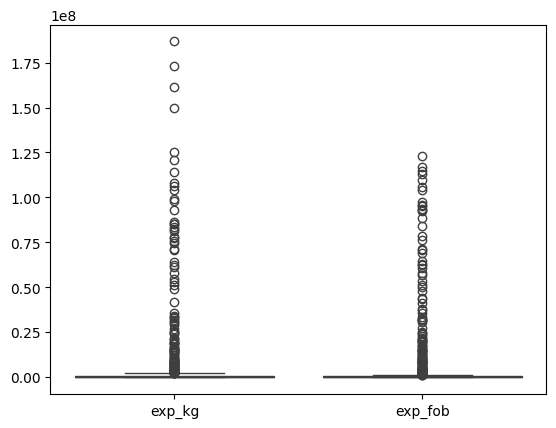

In [ ]:
sns.boxplot(data=brasil[['exp_kg', 'exp_fob']])


<Axes: xlabel='empresas_gg'>

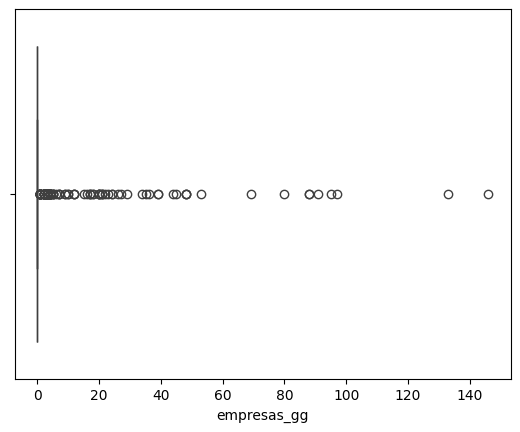

In [ ]:
sns.boxplot(x=brasil['empresas_gg'])


<Axes: xlabel='empresas_gg', ylabel='Count'>

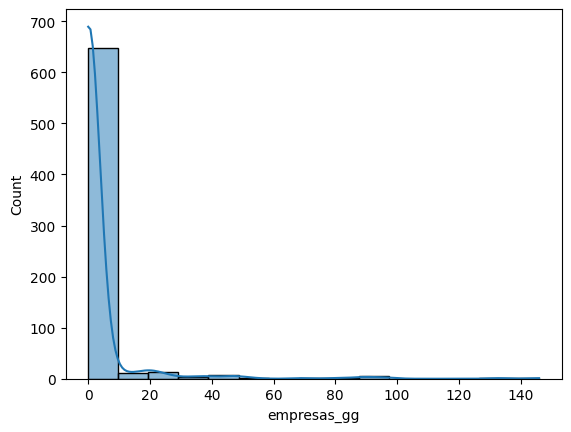

In [ ]:
# Histograma certificados
sns.histplot(data=brasil, x='empresas_gg', binwidth=10, bins=20, kde=True)


CORRELAÇÃO DAS VARIÁVEIS

In [ ]:
# Monta a matriz de correlação das variáveis quantitativas na base de dados
# Armazena tudo em uma variável para uso posterior de plots gráficos
matriz = brasil.loc[:, ['exp_fob', 'exp_USD/KG', 'empresas_gg', 'qte_produzida(ton)',
                        'renda_internacional']].corr(numeric_only=True)


In [ ]:
matriz

,exp_fob,exp_USD/KG,empresas_gg,qte_produzida(ton),renda_internacional
exp_fob,1.000000,-0.104333,0.575221,0.627653,0.388814
exp_USD/KG,-0.104333,1.000000,-0.021460,-0.149659,-0.067020
empresas_gg,0.575221,-0.021460,1.000000,0.495400,0.286483
qte_produzida(ton),0.627653,-0.149659,0.495400,1.000000,0.203117
renda_internacional,0.388814,-0.067020,0.286483,0.203117,1.000000


<Axes: >

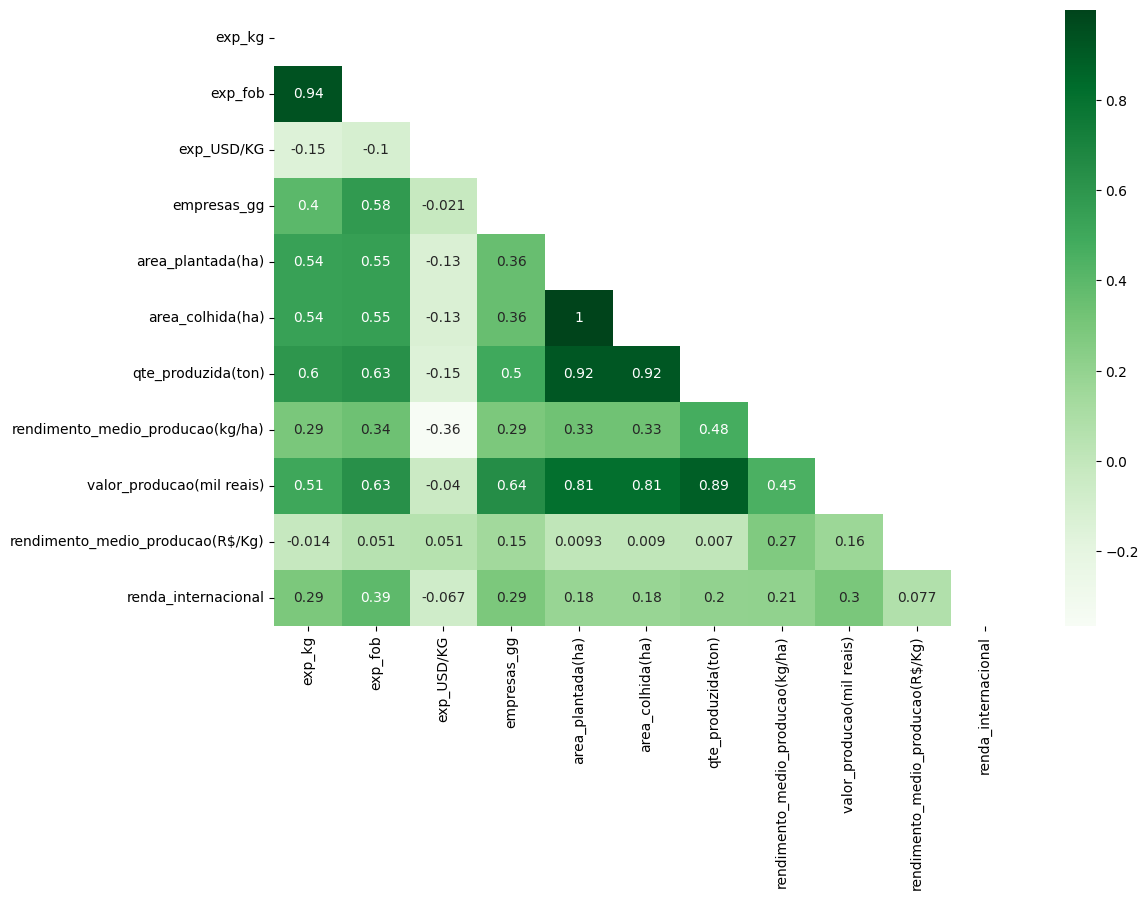

In [ ]:
# Heatmap da matriz de correlação das variáveis
# Ajusta tamanho da figura
fig, ax = plt.subplots(figsize=(12, 8))

# Remove 'duplicatas' do heatmap
mask = np.zeros_like(matriz)
mask[np.triu_indices_from(mask)] = True

# Cria heatmap
sns.heatmap(matriz, cmap='Greens', annot=True, mask=mask, ax=ax)


DISPERSÃO

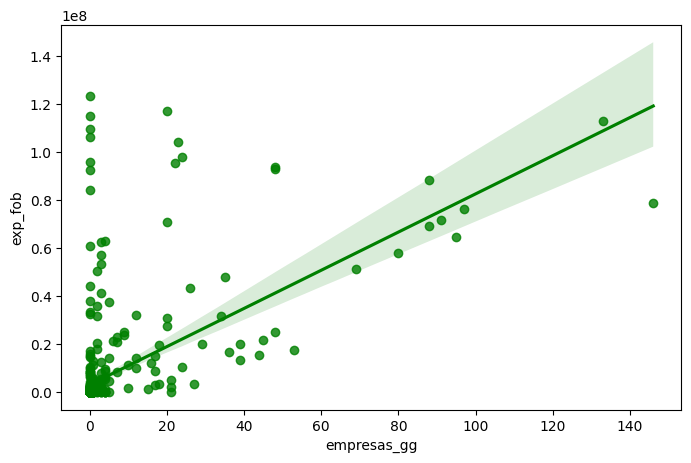

In [ ]:
# Plot das variáveis numero de empreas certificadas global gap e exportações em dólares FOB
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.regplot(data=brasil, x='empresas_gg', y='exp_fob', color='green')


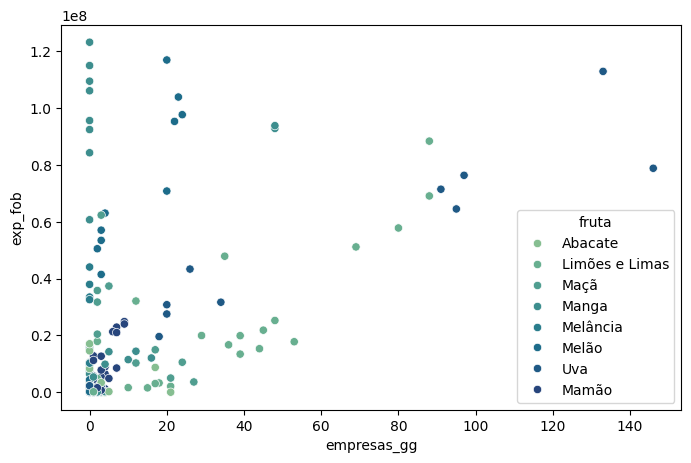

In [ ]:
# Plot das variáveis numero de empreas certificadas global gap e exportações em dólares FOB
# Caracterização dos pares ordenados por variável qualitativa = FRUTA
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.scatterplot(data=brasil, x='empresas_gg', y='exp_fob', hue='fruta', palette='crest')


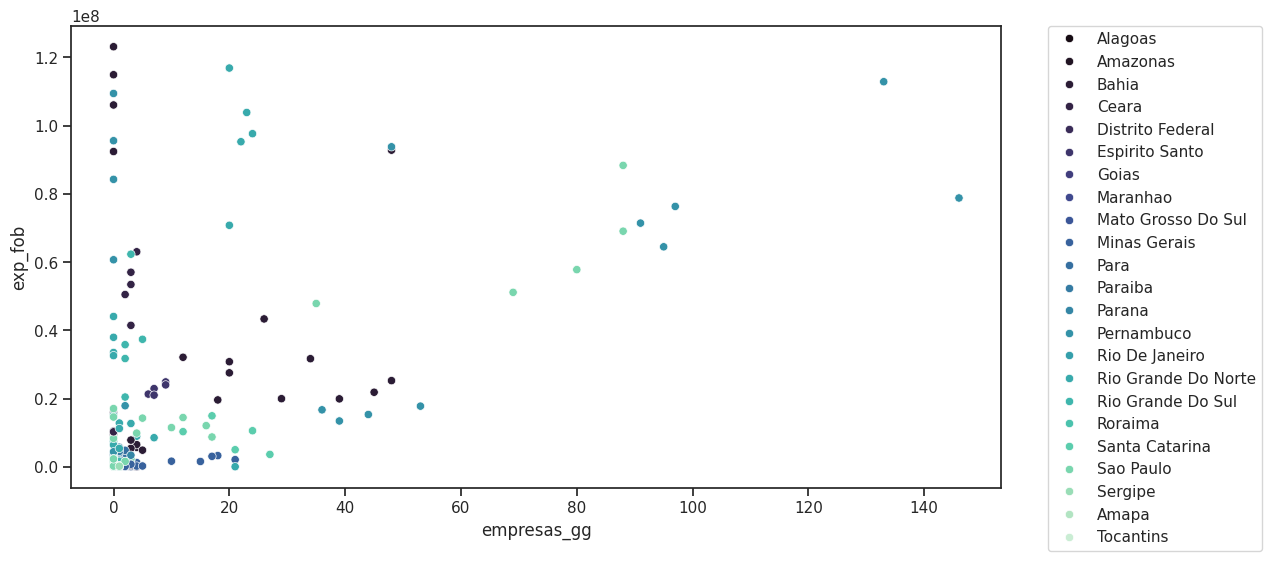

In [ ]:
# Plot das variáveis numero de empreas certificadas global gap e exportações em dólares FOB
# Caracterização dos pares ordenados por variável qualitativa = ESTADOS
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.scatterplot(data=brasil, x='empresas_gg', y='exp_fob', hue='estado', palette='mako')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


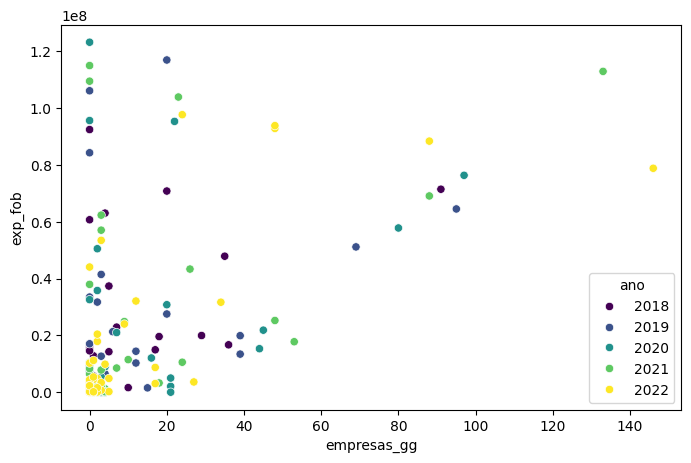

In [ ]:
# Plot das variáveis numero de empreas certificadas global gap e exportações em dólares FOB
# Caracterização dos pares ordenados por variável qualitativa = ANO
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.scatterplot(data=brasil, x='empresas_gg', y='exp_fob', hue='ano', palette='viridis')


---

## ANÁLISE EXPLORATÓRIA - GERAL

In [3]:
# Carrega a base de dados unificada dos 3 países
df = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/UNIFICADO.xlsx', sheet_name=0)
df_series = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/UNIFICADO.xlsx', sheet_name=-1)


In [ ]:
# Ajusta índice do DataFrame para ser igual a coluna de anos
df_series.set_index('ano', inplace=True)


In [ ]:
df_series

,argentina,brasil,chile
ano,,,
2018,177,296,1775
2019,144,351,1874
2020,175,380,1592
2021,184,443,1457
2022,169,481,1643


In [4]:
df.shape

(983, 8)

In [5]:
df.head()

,ano,pais,uf,fruta,exp_usd,exp_kg,exp_usd/kg,empresas_gg
0,2018,argentina,buenos aires,limao_e_lima,223250.64,218685.78,1.020874,2.0
1,2018,argentina,catamarca,limao_e_lima,390688.62,382700.11,1.020874,NaN
2,2018,argentina,corrientes,limao_e_lima,11581126.39,11344324.64,1.020874,NaN
3,2018,argentina,entre rios,limao_e_lima,3097602.49,3034265.14,1.020874,3.0
4,2018,argentina,formosa,limao_e_lima,223250.64,218685.78,1.020874,NaN


In [6]:
# Corrige empresas_gg
# Preencher nulos com zeros
df['empresas_gg'] = df['empresas_gg'].fillna(0)

# Transformar de float para int
df['empresas_gg'] = df['empresas_gg'].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          983 non-null    int64  
 1   pais         983 non-null    object 
 2   uf           983 non-null    object 
 3   fruta        983 non-null    object 
 4   exp_usd      983 non-null    float64
 5   exp_kg       983 non-null    float64
 6   exp_usd/kg   983 non-null    float64
 7   empresas_gg  983 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 61.6+ KB


<Axes: xlabel='empresas_gg', ylabel='Count'>

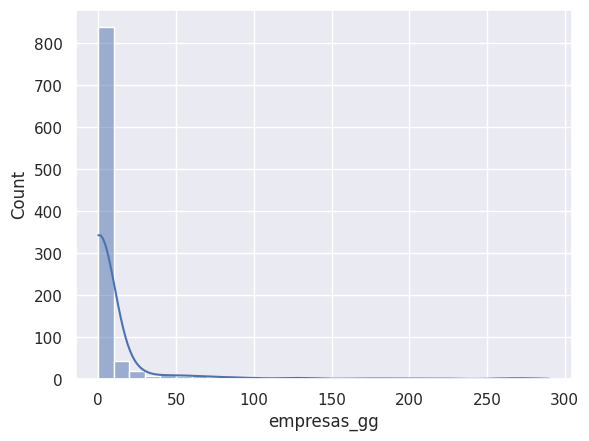

In [ ]:
sns.histplot(data=df, x='empresas_gg', binwidth=10, bins=20, kde=True)

<ipython-input-141-8d4e08fefb81>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=df['exp_usd/kg'], palette='vlag')


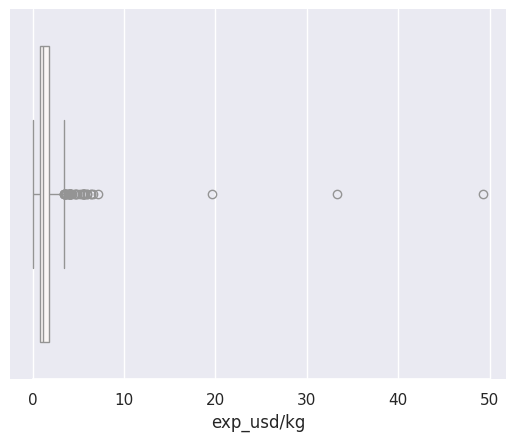

In [ ]:
sns.boxplot(data=df, x=df['exp_usd/kg'], palette='vlag')
#sns.stripplot(data=df, x=df['exp_usd'], size=4, color=".3")
sns.despine(trim=True, left=True)


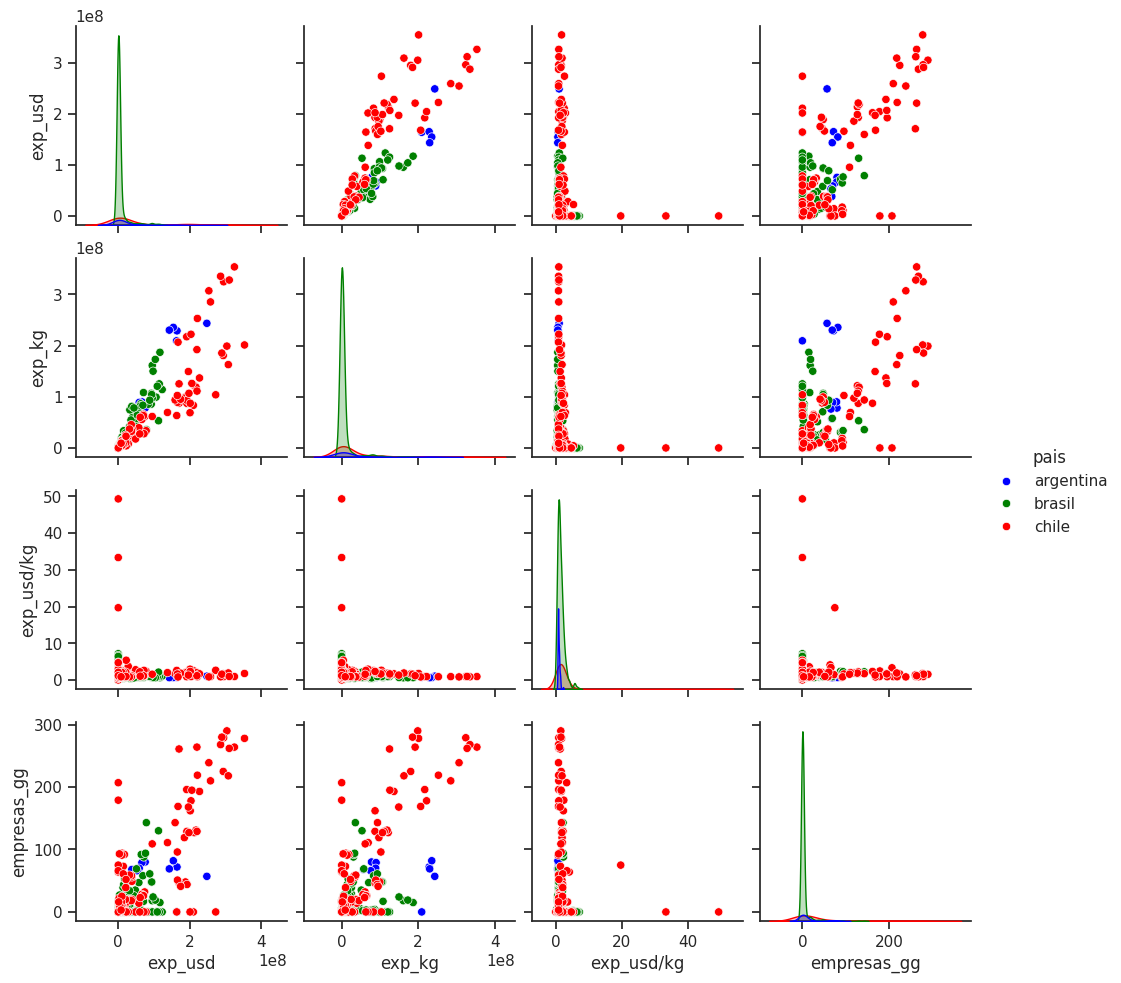

In [ ]:
# Arruma os dados para o pairplot
df2 = df.drop(columns=['ano'], axis=1)

# Plot dos dados
sns.set_theme(style="ticks")
sns.pairplot(df2, hue="pais", palette={'argentina': 'blue' , 'brasil': 'green', 'chile': 'red'})


In [ ]:
ch = df[df['pais'] == 'chile']

In [ ]:
ch['dif'] = ch['exp_usd'] - ch['exp_kg']

<ipython-input-144-6d35a3c2974d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ch['dif'] = ch['exp_usd'] - ch['exp_kg']


In [ ]:
ch['dif'].head(982)

778        64602.7
779       690478.9
780         2740.0
781       -53200.0
782     88882200.0
          ...     
978         8600.0
979    114650400.0
980     -1000700.0
981     -1296200.0
982     47440200.0
Name: dif, Length: 205, dtype: float64

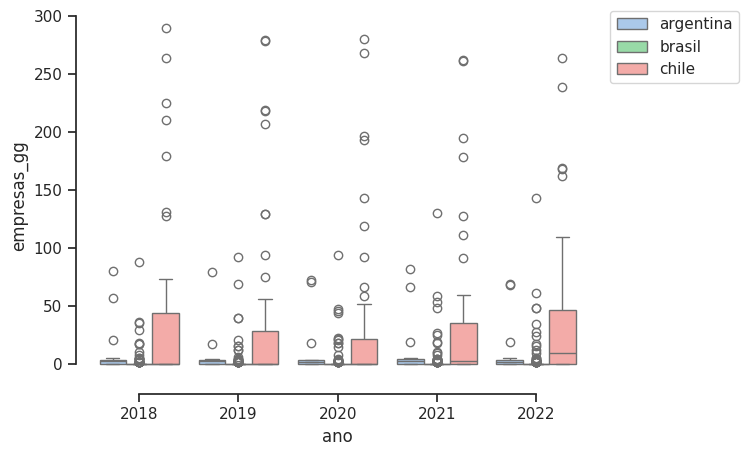

In [ ]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=df, x='ano', y='empresas_gg', hue='pais', palette={'argentina':'b', 'brasil':'g', 'chile':'r'})
sns.despine(offset=10, trim=True)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


---

Correlações

In [8]:
df_ar = df[df['ano'] == 2018]

In [12]:
df_ar[df_ar['pais'] == 'argentina']['exp_usd'].corr(df_ar[df_ar['pais'] == 'argentina']['empresas_gg'])

0.7469686880276442

In [ ]:
df[df['pais'] == 'argentina']['exp_usd'].corr(df[df['pais'] == 'argentina']['empresas_gg'])0

0.7205173814104854

In [ ]:
df[df['pais'] == 'brasil']['exp_usd'].corr(df[df['pais'] == 'brasil']['empresas_gg'])


0.5627508744234765

In [ ]:
df[df['pais'] == 'chile']['exp_usd'].corr(df[df['pais'] == 'chile']['empresas_gg'])


0.8309174609307001

---

ARGENTINA

In [ ]:
# Monta a matriz de correlação das variáveis quantitativas na base de dados
# Armazena tudo em uma variável para uso posterior de plots gráficos
matriz_arg = df[df['pais'] == 'argentina'].loc[:, ['exp_kg', 'exp_usd', 'exp_usd/kg', 'empresas_gg']].corr(numeric_only=True)


In [ ]:
matriz_arg

<Axes: >

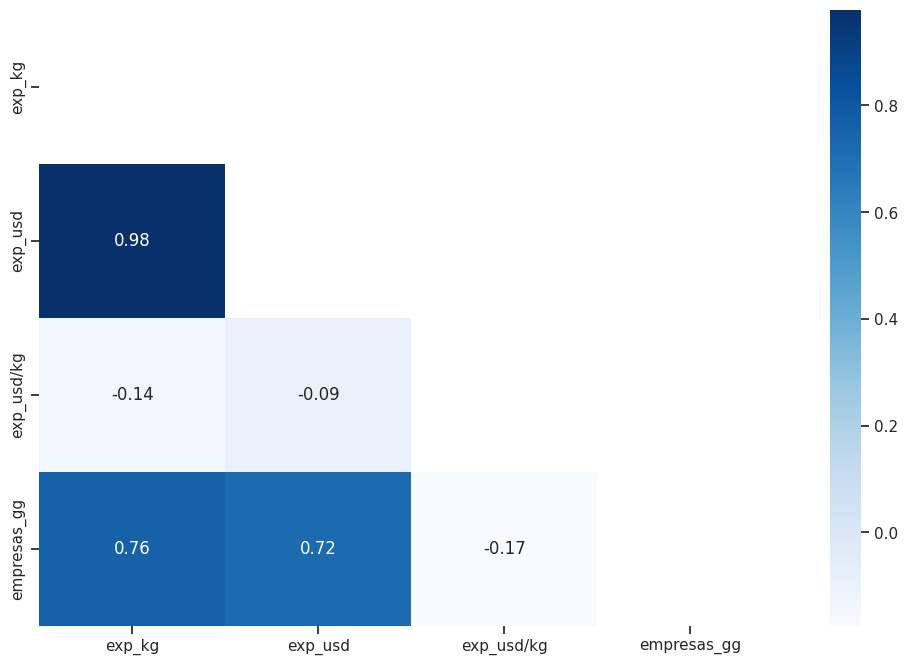

In [ ]:
# Heatmap da matriz de correlação das variáveis
# Ajusta tamanho da figura
fig, ax = plt.subplots(figsize=(12, 8))

# Remove 'duplicatas' do heatmap
mask = np.zeros_like(matriz_arg)
mask[np.triu_indices_from(mask)] = True

# Cria heatmap
sns.heatmap(matriz_arg, cmap='Blues', annot=True, mask=mask, ax=ax)


BRASIL

In [ ]:
# Monta a matriz de correlação das variáveis quantitativas na base de dados
# Armazena tudo em uma variável para uso posterior de plots gráficos
matriz_bra = df[df['pais'] == 'brasil'].loc[:, ['exp_kg', 'exp_usd', 'exp_usd/kg', 'empresas_gg']].corr(numeric_only=True)


In [ ]:
matriz_bra

,exp_kg,exp_usd,exp_usd/kg,empresas_gg
exp_kg,1.000000,0.937483,-0.148769,0.375253
exp_usd,0.937483,1.000000,-0.103467,0.562751
exp_usd/kg,-0.148769,-0.103467,1.000000,-0.017024
empresas_gg,0.375253,0.562751,-0.017024,1.000000


<Axes: >

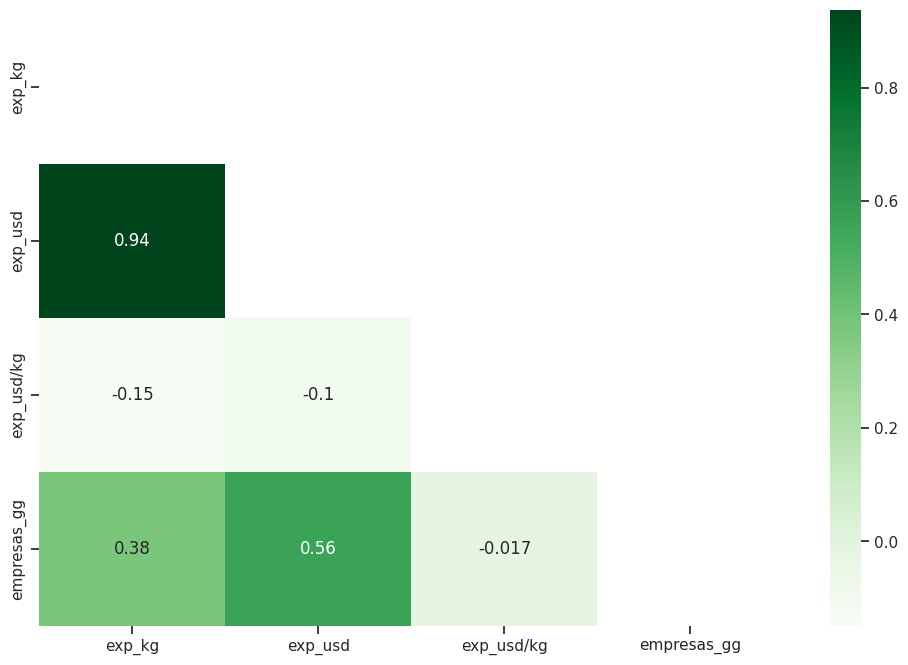

In [ ]:
# Heatmap da matriz de correlação das variáveis
# Ajusta tamanho da figura
fig, ax = plt.subplots(figsize=(12, 8))

# Remove 'duplicatas' do heatmap
mask = np.zeros_like(matriz_bra)
mask[np.triu_indices_from(mask)] = True

# Cria heatmap
sns.heatmap(matriz_bra, cmap='Greens', annot=True, mask=mask, ax=ax)


CHILE

In [ ]:
# Monta a matriz de correlação das variáveis quantitativas na base de dados
# Armazena tudo em uma variável para uso posterior de plots gráficos
matriz_chi = df[df['pais'] == 'chile'].loc[:, ['exp_kg', 'exp_usd', 'exp_usd/kg', 'empresas_gg']].corr(numeric_only=True)


In [ ]:
matriz_chi

,exp_kg,exp_usd,exp_usd/kg,empresas_gg
exp_kg,1.000000,0.918070,-0.081703,0.870024
exp_usd,0.918070,1.000000,-0.062089,0.830917
exp_usd/kg,-0.081703,-0.062089,1.000000,-0.055619
empresas_gg,0.870024,0.830917,-0.055619,1.000000


<Axes: >

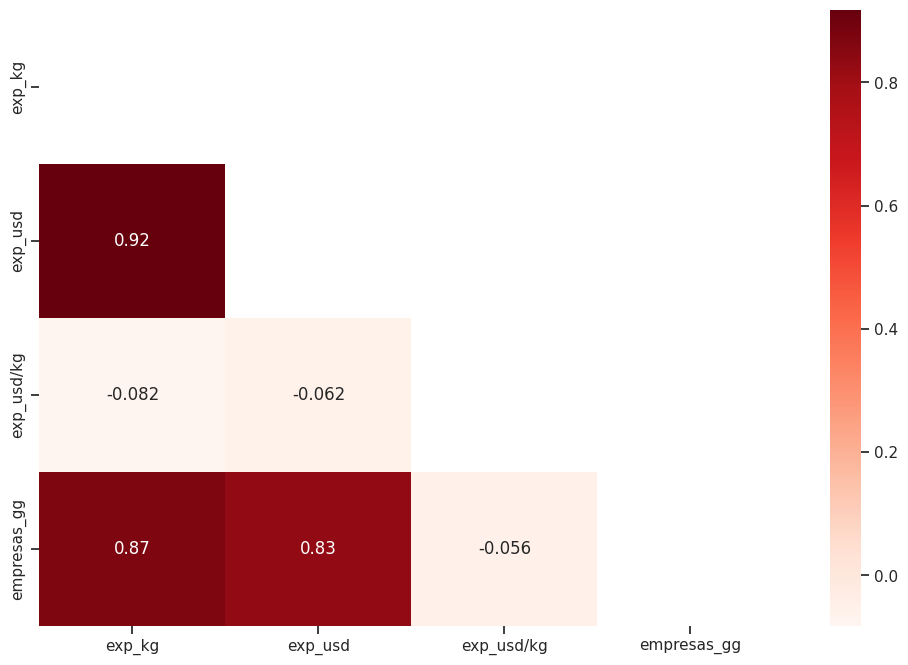

In [ ]:
# Heatmap da matriz de correlação das variáveis
# Ajusta tamanho da figura
fig, ax = plt.subplots(figsize=(12, 8))

# Remove 'duplicatas' do heatmap
mask = np.zeros_like(matriz_chi)
mask[np.triu_indices_from(mask)] = True

# Cria heatmap
sns.heatmap(matriz_chi, cmap='Reds', annot=True, mask=mask, ax=ax)


<Figure size 1200x800 with 0 Axes>

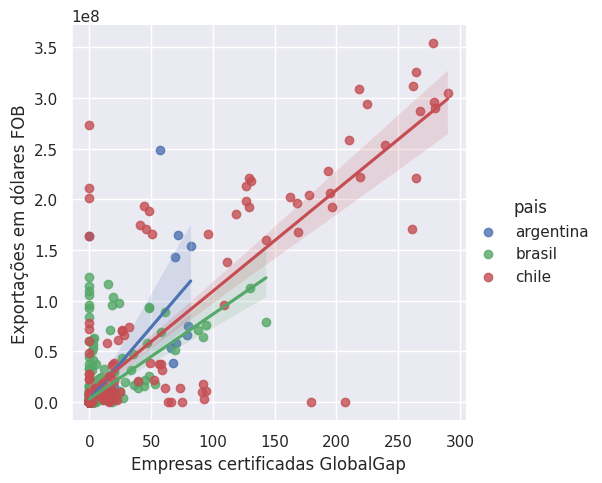

In [ ]:
# Plota a dispersão para os três países em conjunto, diferenciando-as
sns.set_theme()
sns.set_style("darkgrid")

plt.figure(figsize=(12, 8))

graph = sns.lmplot(
    data=df, x="empresas_gg", y="exp_usd", hue="pais", palette={'argentina':'b', 'brasil':'g', 'chile':'r'},
    height=5
)

graph.set_axis_labels("Empresas certificadas GlobalGap", "Exportações em dólares FOB")

plt.show()


In [ ]:
# Agrupa os dados por ano e por país
grouped = df.groupby(['ano', 'pais'])

# Análise estatística
group_export = grouped.describe()
group_export.to_excel('descritiva_base.xlsx')

group_export.head(6)


exp_usd                                                  \
                 count          mean           std     min         25%   
ano  pais                                                                
2018 argentina    16.0  2.379193e+07  6.268056e+07  763.10  348829.125   
     brasil      133.0  4.863585e+06  1.503742e+07   14.00    1688.000   
     chile        42.0  5.761400e+07  9.954039e+07    0.00   51625.000   
2019 argentina    15.0  1.828398e+07  4.352584e+07  864.64  202140.345   
     brasil      135.0  5.330132e+06  1.761809e+07  104.00    6081.000   
     chile        45.0  5.192435e+07  9.985567e+07  100.00   84700.000   

                                                       exp_kg                \
                       50%           75%           max  count          mean   
ano  pais                                                                     
2018 argentina  2862080.11  9.634660e+06  2.485059e+08   16.0  2.346920e+07   
     brasil       33119.00  3.508360e+05  9.242270e+07  133.0  5.220473e+06   
     chile      1564800.00  5.291355e+07  3.257854e+08   42.0  4.091653e+07   
2019 argentina  2308151.49  8.070999e+06  1.636418e+08   15.0  2.352292e+07   
     brasil       43595.00  5.373955e+05  1.169062e+08  135.0  6.156153e+06   
     chile       550000.00  2.549270e+07  3.541144e+08   45.0  3.460613e+07   

                ... exp_usd/kg            empresas_gg                        \
                ...        75%        max       count       mean        std   
ano  pais       ...                                                           
2018 argentina  ...   1.109196   2.201029        16.0  11.062500  23.310852   
     brasil     ...   1.966543   5.656250       133.0   2.225564   9.386980   
     chile      ...   2.048893   4.109589        42.0  42.261905  78.899770   
2019 argentina  ...   0.782007   1.272727        15.0   7.600000  20.208909   
     brasil     ...   1.899210   6.358744       135.0   2.600000  11.133652   
     chile      ...   2.293883  33.333333        45.0  41.644444  78.478183   

                                            
                min  25%  50%   75%    max  
ano  pais                                   
2018 argentina  0.0  0.0  2.0   3.5   80.0  
     brasil     0.0  0.0  0.0   0.0   88.0  
     chile      0.0  0.0  0.0  44.0  290.0  
2019 argentina  0.0  0.0  2.0   3.5   79.0  
     brasil     0.0  0.0  0.0   0.0   92.0  
     chile      0.0  0.0  0.0  28.0  279.0  

[6 rows x 32 columns]

---

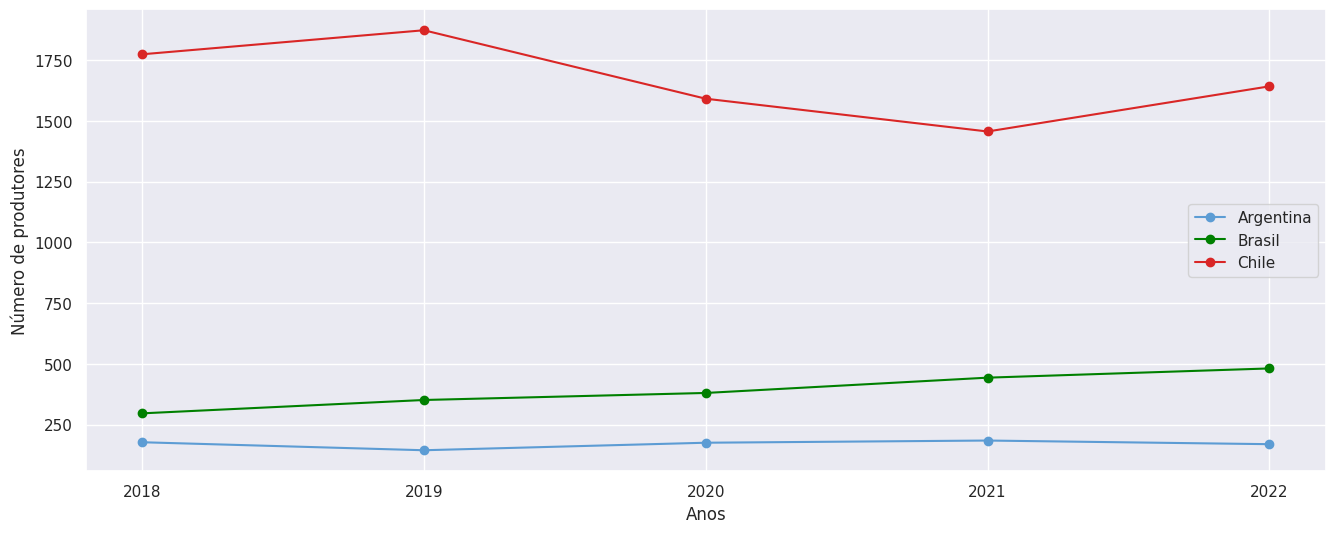

In [ ]:
# Plota o gráfico das séries de produtores
plt.figure(figsize=(16, 6))
plt.plot(df_series.index, df_series['argentina'], label='Argentina', color=(0.36, 0.61, 0.83), marker = 'o')
plt.plot(df_series.index, df_series['brasil'], label='Brasil', color=(0.0, 0.5, 0.0), marker = 'o')
plt.plot(df_series.index, df_series['chile'], label='Chile', color=(0.85, 0.15, 0.15), marker = 'o')

# Rótulos e título
plt.xticks([2018, 2019, 2020, 2021, 2022]) # Definir os ticks do eixo X para os anos inteiros
plt.xlabel('Anos')
plt.ylabel('Número de produtores')
plt.legend()

# Mostra o gráfico
plt.grid(True)

# Salvar o gráfico com alta qualidade
plt.savefig('grafico_series.png', dpi=300, bbox_inches='tight')

plt.show()

---

## CORRELAÇÕES NO TEMPO

---

In [ ]:
df.head()

,ano,pais,uf,fruta,exp_usd,exp_kg,exp_usd/kg,empresas_gg
0,2018,argentina,buenos aires,limao_e_lima,223250.64,218685.78,1.020874,2
1,2018,argentina,catamarca,limao_e_lima,390688.62,382700.11,1.020874,0
2,2018,argentina,corrientes,limao_e_lima,11581126.39,11344324.64,1.020874,0
3,2018,argentina,entre rios,limao_e_lima,3097602.49,3034265.14,1.020874,3
4,2018,argentina,formosa,limao_e_lima,223250.64,218685.78,1.020874,0


In [ ]:
matriz = df[df['ano']] == ['chile', 2018]].loc[:, ['exp_kg', 'exp_usd', 'exp_usd/kg', 'empresas_gg']].corr(numeric_only=True)

In [ ]:
#correlation = df.groupby(['ano', 'pais'])[['empresas_gg', 'exp_usd']].corr()
# Correlações exportadas para tabela, salva no drive

In [ ]:
corr_serie = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Documento - Artigo/Tabelas/Correlações.xlsx', sheet_name=-1)
corr_serie.head()

,Ano,Argentina,Brasil,Chile
0,2018,0.746969,0.549813,0.822954
1,2019,0.278668,0.452778,0.773742
2,2020,0.880385,0.460214,0.872384
3,2021,0.917175,0.559306,0.832517
4,2022,0.831375,0.742073,0.902044


In [ ]:
# Definir unidade de tempo como índice da Série Temporal
corr_serie.set_index('Ano', inplace=True)

In [ ]:
corr_serie

,Argentina,Brasil,Chile
Ano,,,
2018,0.746969,0.549813,0.822954
2019,0.278668,0.452778,0.773742
2020,0.880385,0.460214,0.872384
2021,0.917175,0.559306,0.832517
2022,0.831375,0.742073,0.902044


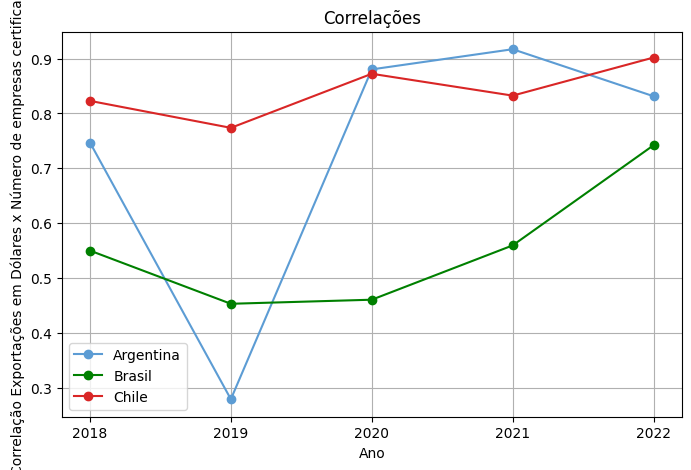

In [ ]:
# Plota o gráfico das correlações como série temporal.
plt.figure(figsize=(8, 5))
plt.plot(corr_serie.index, corr_serie['Argentina'], label='Argentina', color=(0.36, 0.61, 0.83), marker = 'o')
plt.plot(corr_serie.index, corr_serie['Brasil'], label='Brasil', color=(0.0, 0.5, 0.0), marker = 'o')
plt.plot(corr_serie.index, corr_serie['Chile'], label='Chile', color=(0.85, 0.15, 0.15), marker = 'o')

# Rótulos e título
plt.xticks([2018, 2019, 2020, 2021, 2022]) # Definir os ticks do eixo X para os anos inteiros
plt.xlabel('Ano')
plt.ylabel('Correlação Exportações em Dólares x Número de empresas certificadas')
plt.title('Correlações')
plt.legend()

# Mostra o gráfico
plt.grid(True)
plt.show()


---

## MAPAS

In [ ]:
# AEDE
# Dados geoespaciais
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
### CARREGAMENTO DOS DADOS PARA A PLOTAGEM ###
# Carrega os SHAPEFILES de cada país
path_argentina = '/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/ARGENTINA/provincia.shp'
path_brasil = '/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/BRASIL/BR_UF_2022.shp'
path_chile = '/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/CHILE/Regional.shp'

# Carrega as CERTIFICAÇÕES POR ESTADO de cada pais
uf_ar = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/combinar_shp.xlsx',
                      sheet_name=0)
uf_br = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/combinar_shp.xlsx',
                      sheet_name=1)
uf_ch = pd.read_excel('/content/drive/MyDrive/Pesquisa - Talles/Padrões de normas vigentes no comércio internacional: caracterização e análise do efeito da norma Globalgap sobre as exportações de frutas no Brasil, Chile e Argentina./Dados/Shapefiles/combinar_shp.xlsx',
                      sheet_name=2)


In [ ]:
# Carrega os shapefiles dos estados brasileiros, províncias argentinas e regiões chilenas
ar_uf_d = gpd.read_file(path_argentina)
br_uf_d = gpd.read_file(path_brasil)
ch_uf_d = gpd.read_file(path_chile)


In [ ]:
# Exlcui colunas desnecessárias
br_uf_d.drop(columns=['CD_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2'], axis=1, inplace=True)
ar_uf_d.drop(columns=['gid', 'entidad', 'fna', 'gna', 'in1', 'fdc', 'sag'], axis=1, inplace=True)
ch_uf_d.drop(columns=['objectid', 'cir_sena', 'codregion', 'area_km', 'st_area_sh', 'st_length_'], axis=1, inplace=True)

In [ ]:
# Renomeia as colunas para que os nomes das unidades federativas sejam compatíveis
# Pensando na futura união de dataframes
ar_uf_d.rename(columns={'nam': 'provincias'}, inplace=True)
br_uf_d.rename(columns={'NM_UF': 'estado'}, inplace=True)
ch_uf_d.rename(columns={'Region': 'regiones'}, inplace=True)

In [ ]:
# Combina os dados com base na coluna em comum que eles possuem
# Renomeação é importante por isso
geo_ar = pd.merge(uf_ar, ar_uf_d, on='provincias')
geo_br = pd.merge(uf_br, br_uf_d, on='estado')
geo_ch = pd.merge(uf_ch, ch_uf_d, on='regiones')


AttributeError: 'Figure' object has no attribute 'set_xlabel'

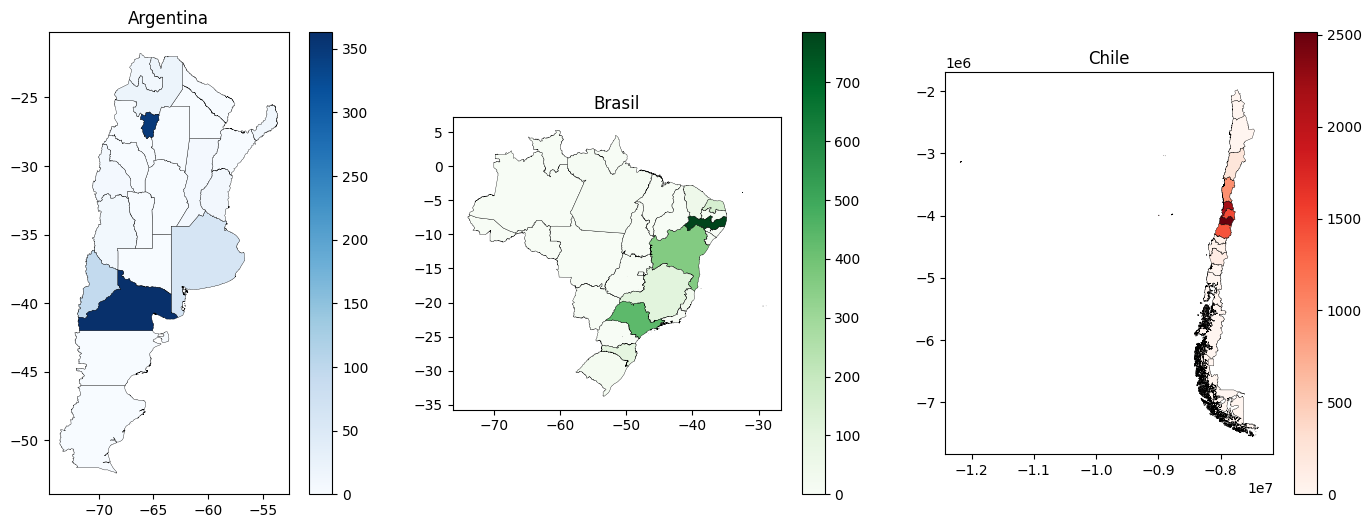

In [ ]:
# # #                             ***MAPAS***                              # # #
################################################################################
# Plota o mapa cloroplético
# Estados com maior número de empresas certificadas globalgap

# Cria o objeto matplotlib para alocar os mapas
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Cria os objetos do geopandas
gdf_ar = gpd.GeoDataFrame(geo_ar, geometry='geometry')
gdf_br = gpd.GeoDataFrame(geo_br, geometry='geometry')
gdf_ch = gpd.GeoDataFrame(geo_ch, geometry='geometry')

################################################################################

### 1º subplot => ARGENTINA ###
axes[0].set_title('Argentina') # Apenas define título

gdf_ar.plot(column='empresas_gg', cmap='Blues', edgecolor='black', linewidth=0.25, legend=True, ax=axes[0])

### 2º subplot => BRASIL ###
axes[1].set_title('Brasil') # Apenas define título

gdf_br.plot(column='empresas_gg', cmap='Greens', edgecolor='black', linewidth=0.25, legend=True, ax=axes[1])

### 3º subplot = CHILE ###
axes[2].set_title('Chile') # Apenas define título

gdf_ch.plot(column='empresas_gg', cmap='Reds', edgecolor='black', linewidth=0.25, legend=True, ax=axes[2])

################################################################################

# Nome dos eixos
for ax in axes:
  ax.set_xlabel('Longitude')
  ax.set_ylabel('Latitude')

# Título geral da figura plotada
fig.suptitle('Empresas certicadas por Províncias, Estados e Regiões')

plt.show()

################################################################################

# Salvar figura com alta qualidade

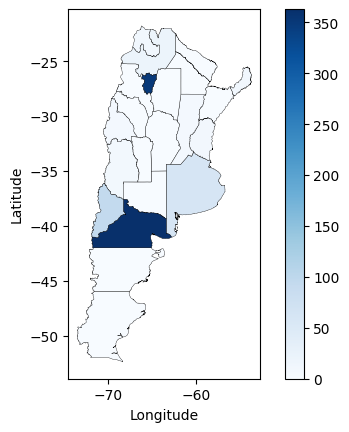

In [ ]:
figsize=(18, 6)

gdf_ar = gpd.GeoDataFrame(geo_ar, geometry='geometry')
gdf_ar.plot(column='empresas_gg', cmap='Blues', edgecolor='black', linewidth=0.25, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Salvar o gráfico com alta qualidade
plt.savefig('grafico_argentina.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


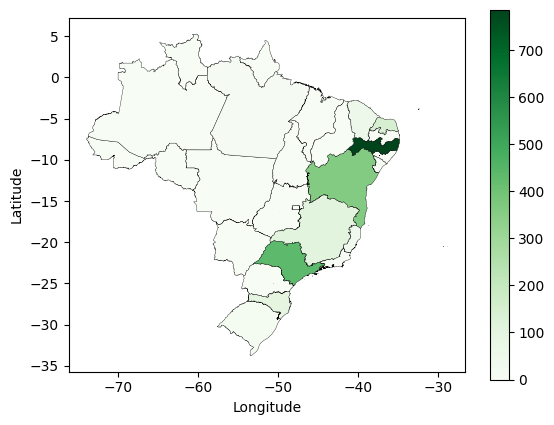

In [ ]:
figsize=(18, 6)

gdf_br = gpd.GeoDataFrame(geo_br, geometry='geometry')
gdf_br.plot(column='empresas_gg', cmap='Greens', edgecolor='black', linewidth=0.25, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Salvar o gráfico com alta qualidade
plt.savefig('grafico_brasil.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()


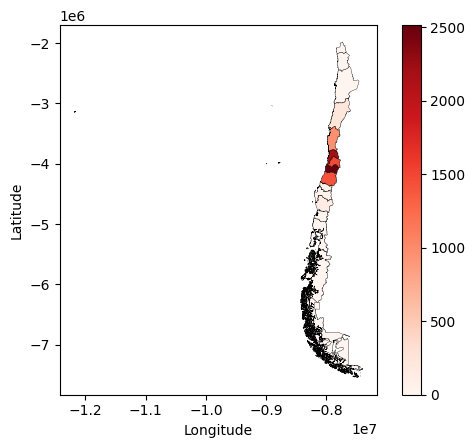

In [ ]:
figsize=(18, 6)

gdf_ch = gpd.GeoDataFrame(geo_ch, geometry='geometry')
gdf_ch.plot(column='empresas_gg', cmap='Reds', edgecolor='black', linewidth=0.25, legend=True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Salvar o gráfico com alta qualidade
plt.savefig('grafico_chile.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()
